In [2]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import os
import csv
%matplotlib inline

In [3]:
firecsv = pd.read_csv('fire_clean.csv')

In [4]:
firecsv

,FOD_ID,SOURCE_SYSTEM,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,1,FS-FIRESTAT,Plumas National Forest,2005,Miscellaneous,0.10,A,40.036944,-121.005833,CA
1,2,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.25,A,38.933056,-120.404444,CA
2,3,FS-FIRESTAT,Eldorado National Forest,2004,Debris Burning,0.10,A,38.984167,-120.735556,CA
3,4,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.10,A,38.559167,-119.913333,CA
4,5,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.10,A,38.559167,-119.933056,CA
...,...,...,...,...,...,...,...,...,...,...
1880460,300348363,ST-CACDF,Shasta-Trinity Unit,2015,Missing/Undefined,0.01,A,40.481637,-122.389375,CA
1880461,300348373,ST-CACDF,Tuolumne-Calaveras Unit,2015,Miscellaneous,0.20,A,37.617619,-120.938570,CA
1880462,300348375,ST-CACDF,Tuolumne-Calaveras Unit,2015,Missing/Undefined,0.10,A,37.617619,-120.938570,CA
1880463,300348377,ST-CACDF,Tuolumne-Calaveras Unit,2015,Missing/Undefined,2.00,B,37.672235,-120.898356,CA


In [5]:
pivoted_table = firecsv.pivot_table(index="STATE", values="FIRE_SIZE", aggfunc="sum").rename_axis(None, axis=1).sort_values(by=["FIRE_SIZE"]).reset_index()

In [6]:
pivoted_table["FIRE_SIZE"] = pivoted_table["FIRE_SIZE"].astype("int64")

In [7]:
pivoted_table

,STATE,FIRE_SIZE
0,DC,32
1,RI,562
2,VT,1556
3,NH,3862
4,DE,4833
5,MA,6124
6,CT,11243
7,IN,17322
8,IL,22807
9,OH,23933


In [8]:
# Pie Chart grouping
# States > 5 million acres burned
top_states = pivoted_table.loc[((pivoted_table["FIRE_SIZE"]) >= 7000000)]
# States 1-5 million acres burned
middle_states = pivoted_table.loc[((pivoted_table["FIRE_SIZE"]) >= 1000000) & ((pivoted_table["FIRE_SIZE"]) < 7000000)]
# States 100k to 999k acres burned
less_states = pivoted_table.loc[((pivoted_table["FIRE_SIZE"]) >= 100000) & ((pivoted_table["FIRE_SIZE"]) <= 999999)]
# All other states
other_states = pivoted_table.loc[((pivoted_table["FIRE_SIZE"]) <= 99999)]

# math_passers = student_data.loc[student_data["math_score"] >= 70]
# math_passers_grp = math_passers.groupby(["school_name"], as_index=False).count()
# math_df = pd.DataFrame(math_passers_grp["math_score"]).reset_index()

In [9]:
middle_sum = middle_states["FIRE_SIZE"].sum()
less_states = less_states["FIRE_SIZE"].sum()
other_sum = other_states["FIRE_SIZE"].sum()

In [10]:
pie_data = pd.DataFrame(top_states)
pie_data

,STATE,FIRE_SIZE
46,OR,8412801
47,NV,9015855
48,TX,9786218
49,CA,12745858
50,ID,13684334
51,AK,32233094


In [11]:
middle_list = {'STATE':'1-5 mill', 'FIRE_SIZE':middle_sum}
pie_data = pie_data.append(middle_list, ignore_index=True)

In [14]:
other_list= {'STATE':'Under 99k', 'FIRE_SIZE':other_sum}
pie_data = pie_data.append(other_list, ignore_index=True)

In [15]:
pie_data

,STATE,FIRE_SIZE
0,OR,8412801
1,NV,9015855
2,TX,9786218
3,CA,12745858
4,ID,13684334
5,AK,32233094
6,1-5 mill,45568210
7,Under 99k,492775


In [17]:
sizes = pie_data["FIRE_SIZE"]
labels = pie_data["STATE"]

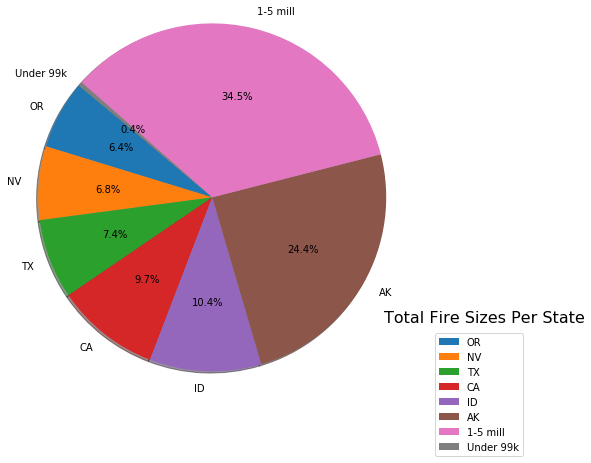

In [20]:
# 1. Total fire size per significant statea (pie chart)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140, radius=2)
plt.legend(loc=2, bbox_to_anchor=(1.5, -0.1))
figure_title = "Total Fire Sizes Per State"
plt.title("Total Fire Sizes Per State", x=1.75, y=-0.1, fontsize="16")
plt.savefig("total_fire_sizes_per_state.png", bbox_inches = "tight")

In [611]:
# 2. Average Fire Size Per State 
count_table = firecsv.pivot_table(index="STATE", values="FIRE_SIZE", aggfunc="mean").rename_axis(None, axis=1).sort_values(by=["FIRE_SIZE"]).reset_index()
count_table

,STATE,FIRE_SIZE
0,DC,0.492424
1,NY,1.159540
2,RI,1.171688
3,NH,1.575044
4,ME,1.867349
5,CT,2.259508
6,MA,2.332342
7,WI,2.783192
8,VT,3.413346
9,NJ,5.085496


In [612]:
count_table["FIRE_SIZE"] = count_table["FIRE_SIZE"].astype("int64")

In [613]:
# Bar Chart grouping
# # States with biggest size of fires
top_mean = count_table.loc[((count_table["FIRE_SIZE"]) >= 100)]
# States that have slightly smaller size fires
mid_mean = count_table.loc[((count_table["FIRE_SIZE"]) >= 20) & ((count_table["FIRE_SIZE"]) <= 80)]
# # All other states
other_states = count_table.loc[((count_table["FIRE_SIZE"]) <= 24)]

In [614]:
other_states

,STATE,FIRE_SIZE
0,DC,0
1,NY,1
2,RI,1
3,NH,1
4,ME,1
5,CT,2
6,MA,2
7,WI,2
8,VT,3
9,NJ,5


In [615]:
mid_mean_mean = mid_mean.mean()

In [616]:
mid_mean_mean

FIRE_SIZE    43.666667
dtype: float64

In [617]:
other_states_mean = other_states.mean()
other_states_mean

FIRE_SIZE    8.037037
dtype: float64

In [618]:
mean_df = {"STATE": ["25-70 acres", ">22 acres"], "FIRE_SIZE":[43.66, 8.03]}
mean_df = pd.DataFrame(mean_df)
mean_df

,STATE,FIRE_SIZE
0,25-70 acres,43.66
1,>22 acres,8.03


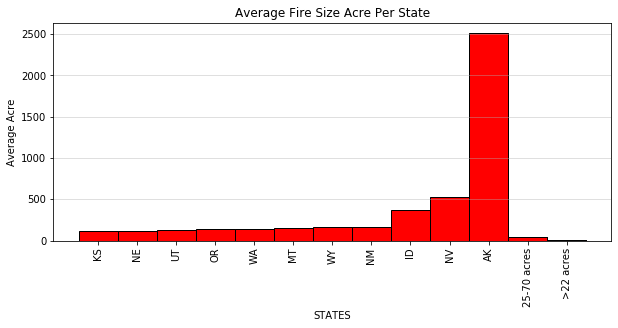

In [619]:
fig, ax = plt.subplots(figsize=(10,4))
bar_x = top_mean["STATE"]
bar_x2 = mean_df["STATE"]
bar_x3 = mean_df["STATE"]
bar_y = top_mean["FIRE_SIZE"]
bar_y2 = mean_df["FIRE_SIZE"]
bar_y3 = mean_df["FIRE_SIZE"]
z = 1
bar_pass = ax.bar(bar_x, bar_y, z, color="red", edgecolor="black")
bar_pass = ax.bar(bar_x2, bar_y2, z, color="red", edgecolor="black")
bar_pass = ax.bar(bar_x3, bar_y2, z, color="red", edgecolor="black")
plt.xticks(rotation=90)
ax.set_title("Average Fire Size Acre Per State")
ax.set_xlabel("STATES")
ax.set_ylabel("Average Acre")
ax.grid(axis="y", alpha=0.5)
plt.savefig("avg_fire_size_per_state.png")

In [620]:
cluster_data = firecsv.pivot_table(index="STATE", columns="FIRE_YEAR", values="FIRE_SIZE", aggfunc="sum").rename_axis(None, axis=1).reset_index()
cluster_data = pd.DataFrame(cluster_data).set_index("STATE").fillna(0)
cluster_data

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
STATE,,,,,,,,,,,,,,,,,,,,,
AK,142717.400,687191.500,261964.900,43962.100,598797.200,2026204.50,120782.10000,1.005844e+06,756379.200,219924.700,...,2.545138e+05,6.344661e+05,9.247760e+04,2.949594e+06,1.137533e+06,2.930041e+05,300587.000,1.320759e+06,233601.280000,5.136704e+06
AL,1253.200,2336.800,34664.400,38896.600,47683.200,22055.40,35560.60000,5.254820e+04,88267.400,39095.100,...,7.954912e+04,5.678519e+04,2.329629e+04,2.492774e+04,4.207847e+04,5.409718e+04,29156.460,2.993541e+04,37961.505000,3.083371e+04
AR,1478.500,1760.200,2303.900,5190.400,5286.800,11442.40,13023.10000,2.403230e+04,29052.500,14451.800,...,6.793981e+04,2.568442e+04,1.119943e+04,1.777574e+04,3.475471e+04,4.789969e+04,38848.490,1.329869e+04,21041.610000,1.873241e+04
AZ,42593.650,205567.020,224199.735,262152.830,187400.565,13356.90,27378.80000,7.379900e+04,92910.300,35816.740,...,1.815340e+05,1.151887e+05,1.139154e+05,2.220653e+05,8.772382e+04,1.037769e+06,228818.600,1.032529e+05,203176.164000,1.558143e+05
CA,296439.800,321495.300,407944.700,216068.700,707110.500,324566.30,160013.10000,8.041234e+05,252676.000,350176.700,...,8.127119e+05,1.045292e+06,1.430154e+06,4.553500e+05,1.209470e+05,1.922869e+05,764766.640,5.814103e+05,546878.780000,8.487286e+05
CO,7451.900,35555.300,70760.600,20043.700,70040.500,6038.20,8379.20000,2.031390e+04,115784.300,23005.700,...,4.589376e+04,1.402605e+04,1.120236e+05,3.772396e+04,5.189506e+04,1.272206e+05,271263.390,1.621302e+05,24694.310000,2.280235e+04
CT,466.050,401.100,943.150,427.400,66.450,600.35,131.90000,1.672460e+03,492.300,745.100,...,4.335000e+02,2.810500e+02,2.055800e+03,2.448300e+02,4.560300e+02,2.373800e+02,517.300,0.000000e+00,0.000000,4.175000e+02
DC,0.400,9.800,5.100,0.600,0.000,0.30,4.40000,2.100000e+00,0.000,0.100,...,5.000000e-01,2.000000e-01,1.000000e-01,5.000000e-01,1.000000e-01,2.000000e-01,4.400,1.000000e-01,0.200000,2.200000e+00
DE,124.000,1.000,96.000,2014.400,0.000,24.60,0.00000,5.070000e+02,65.000,10.500,...,0.000000e+00,2.000000e-01,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,39.850,2.035000e+01,5.000000,7.925000e+01


In [621]:
# Data filtered for 2010-2015 to reduce size
# clustered_years = cluster_data.drop(cluster_data.iloc[:, 2:4], axis=1).set_index("STATE").fillna(0)
# clustered_years = cluster_data.drop(cluster_data.iloc[:, 1:8], axis=1).set_index("STATE").fillna(0)

In [622]:
# Data filtered for the top states to reduce size
cluster_filter = cluster_data.loc[["CA", "ID", "AK"]]

In [623]:
cluster_filter = pd.DataFrame(cluster_filter).reset_index()
cluster_filter

,STATE,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,CA,296439.8,321495.3,407944.7,216068.7,707110.5,324566.3,160013.1,8.041234e+05,252676.00,...,812711.940,1.045292e+06,1430153.60,455350.04,120947.04,192286.92,764766.64,581410.292,546878.78,848728.61
1,ID,684658.9,7978.2,729029.6,268681.3,896659.9,42902.4,151299.3,4.161858e+05,1350786.48,...,910786.471,2.184656e+06,175190.36,23907.91,643868.16,409349.05,1775106.39,740325.500,198892.57,791026.11
2,AK,142717.4,687191.5,261964.9,43962.1,598797.2,2026204.5,120782.1,1.005844e+06,756379.20,...,254513.800,6.344661e+05,92477.60,2949593.97,1137532.67,293004.10,300587.00,1320759.300,233601.28,5136703.76


In [624]:
bar_width = 0.25

bars_1995 = cluster_filter[1995]
bars_2000 = cluster_filter[2000]
bars_2005 = cluster_filter[2005]
bars_2010 = cluster_filter[2010]
bars_2015 = cluster_filter[2015]

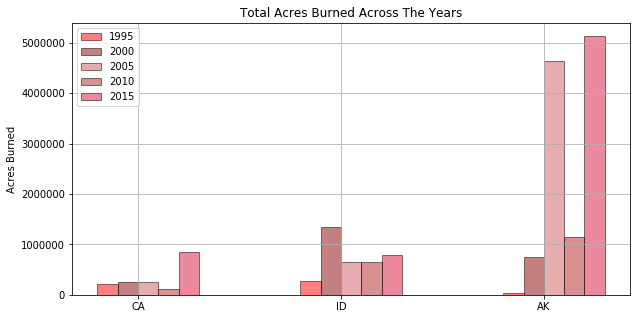

<Figure size 432x288 with 0 Axes>

In [627]:
position = list(range(len(cluster_filter[1995]))) 
width = 0.10 

fig, ax = plt.subplots(figsize=(10,5))

plt.bar(position, 
        bars_1995, 
        width, 
        alpha=0.5,
        edgecolor='black',
        color='red', 
        label=cluster_filter['STATE'][0]) 
plt.bar([p + width for p in position],
        bars_2000, 
        width, 
        alpha=0.5,
        edgecolor='black',
        color='darkred', 
        label=cluster_filter['STATE'][0]) 
plt.bar([p + width*2 for p in position],
        bars_2005, 
        width, 
        alpha=0.5,
        edgecolor='black',
        color='indianred', 
        # with label the first value in first_name
        label=cluster_filter['STATE'][0]) 
plt.bar([p + width*3 for p in position],
        bars_2010, 
        width, 
        alpha=0.5,
        edgecolor='black',
        color='firebrick', 
        # with label the first value in first_name
        label=cluster_filter['STATE'][0]) 
plt.bar([p + width*4 for p in position],
        bars_2015, 
        width, 
        alpha=0.5,
        edgecolor='black',
        color='crimson', 
        # with label the first value in first_name
        label=cluster_filter['STATE'][0]) 

ax.set_ylabel('Acres Burned')
ax.set_title('Total Acres Burned Across The Years')
ax.set_xticks([p + 1.5 * width for p in position])
ax.set_xticklabels(cluster_filter['STATE'])
plt.legend(['1995', '2000', '2005', '2010', '2015' ], loc='upper left')
plt.grid()
plt.show()
plt.savefig("total_acres_burned_top_3_states.png")